<a href="https://colab.research.google.com/github/Tushar-rai/Bank_Personal_loan_modelling/blob/main/Bank_Personal_loan_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP 1**
 
 
 Importing the datasets and libraries, checking datatype, statistical summary, shape, null
values etc

In [64]:
#Importing Standard Libraries

import pandas as pd
import numpy as np                    #For mathematical calculation
import seaborn as sns                 #For data visualization
import matplotlib.pyplot as plt       #For plotting graphs
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Uploading the file
from google.colab import files 


uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


In [186]:
#reading the excel sheet
df=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)

In [187]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [188]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [189]:
#Name of variables
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [190]:
#Shape of the data set
df.shape

(5000, 14)

In [191]:
#summary of the dataset
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**STEP 2**


 Check if you need to clean the data for any of the variables

In [192]:
#Converting the negative values to zero 

df[df < 0] = 0
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [193]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [194]:
#To display null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**STEP 3**


EDA

In [195]:
#To display number of unique values in each column
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [196]:
#Droppind ZIP Code column

df.drop('ZIP Code',axis=1,inplace=True)

In [197]:
#Number of people with zero mortgage

(df.Mortgage == 0).sum()

3462

In [198]:
#Number of people with zero credit card spending per month

(df.CCAvg == 0).sum()

106

In [199]:
#Counting number of zero values in every columns

(df == 0).astype(int).sum(axis=0)

ID                       0
Age                      0
Experience             118
Income                   0
Family                   0
CCAvg                  106
Education                0
Mortgage              3462
Personal Loan         4520
Securities Account    4478
CD Account            4698
Online                2016
CreditCard            3530
dtype: int64

In [200]:
#Value count for all categorical column
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [201]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [202]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [203]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [204]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [205]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [206]:
df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

Univariate Analysis

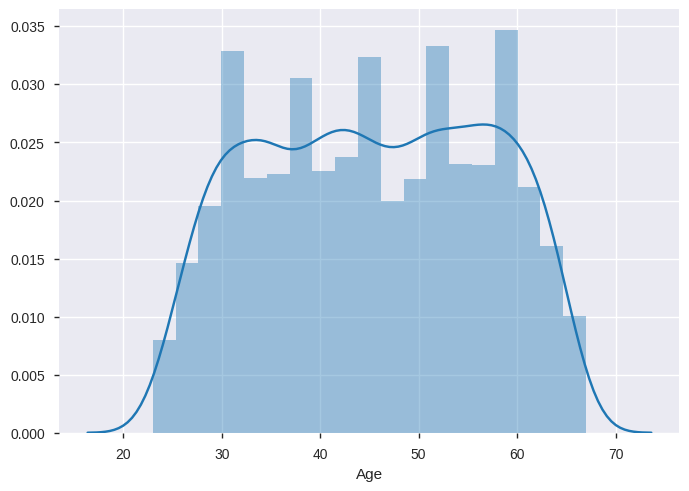

In [207]:
 sns.distplot(df.Age);

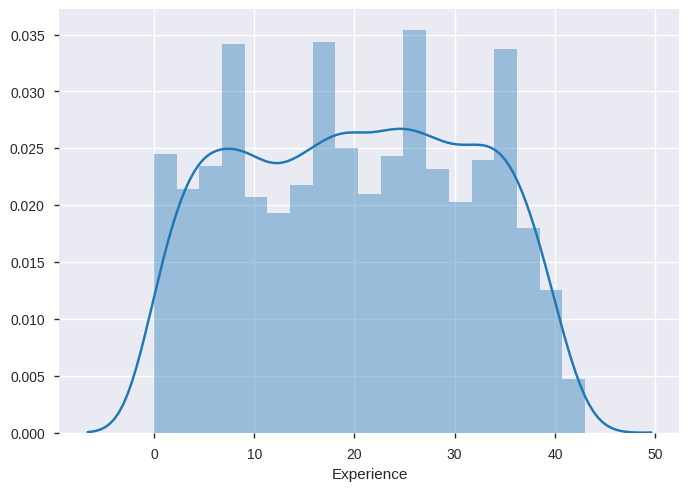

In [208]:
 sns.distplot(df.Experience);

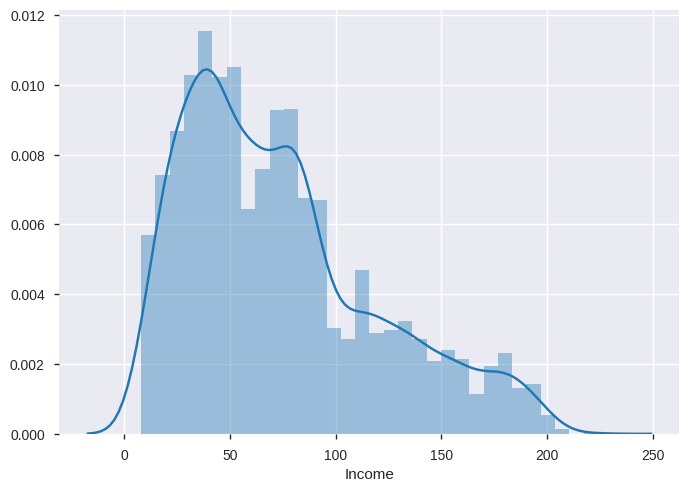

In [209]:
 sns.distplot(df.Income);

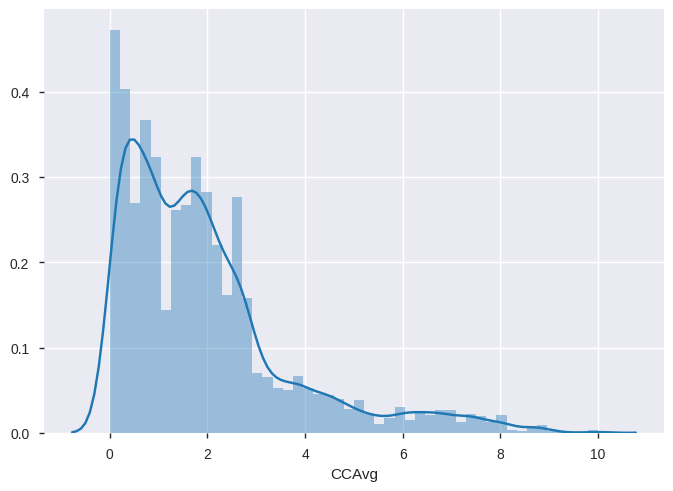

In [210]:
 sns.distplot(df.CCAvg);

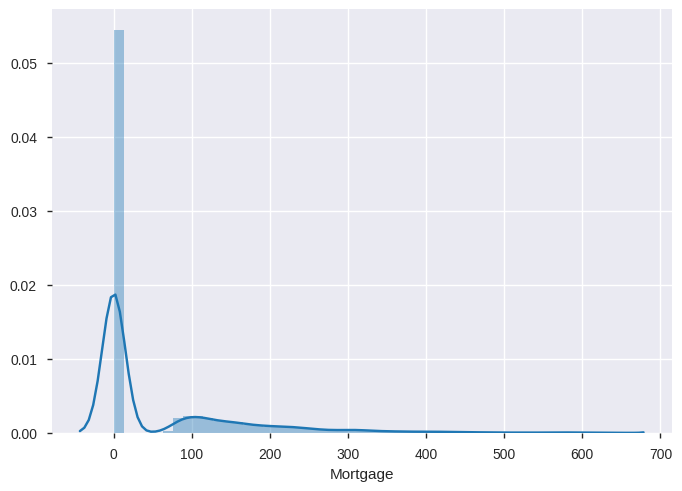

In [211]:
 sns.distplot(df.Mortgage);

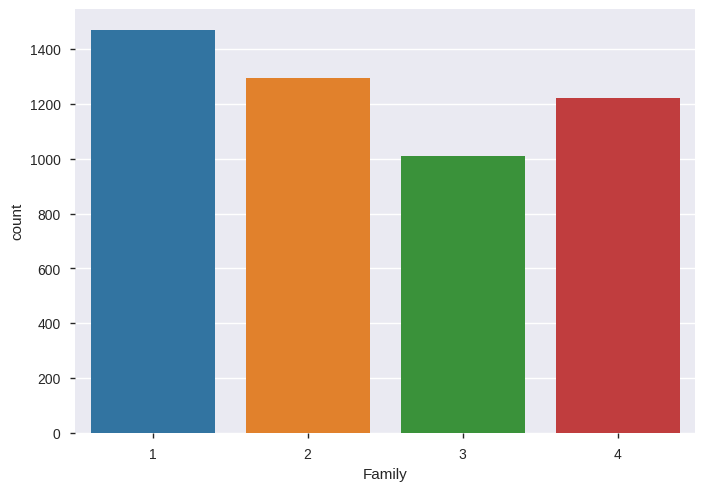

In [212]:
sns.countplot(df.Family)

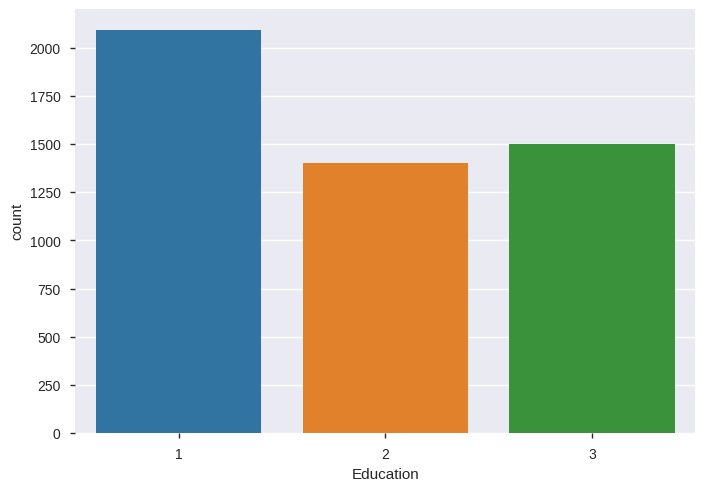

In [213]:
sns.countplot(df.Education)

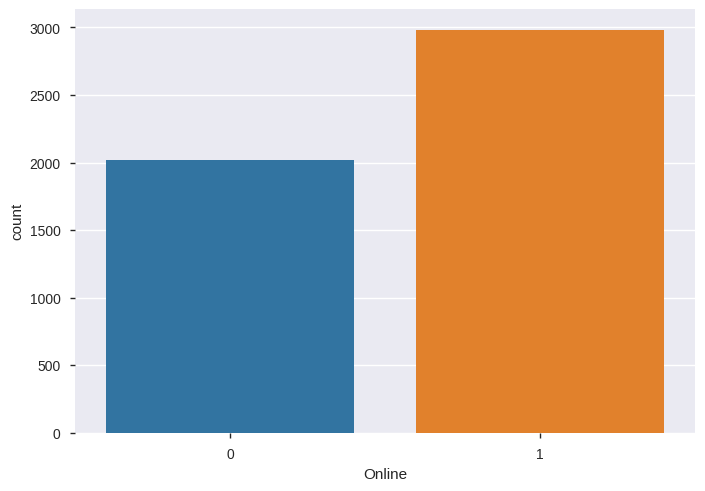

In [214]:
sns.countplot(df.Online)

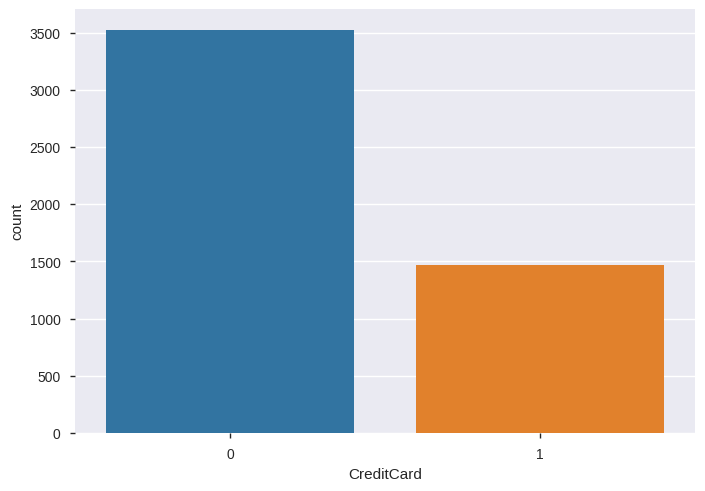

In [215]:
sns.countplot(df.CreditCard)

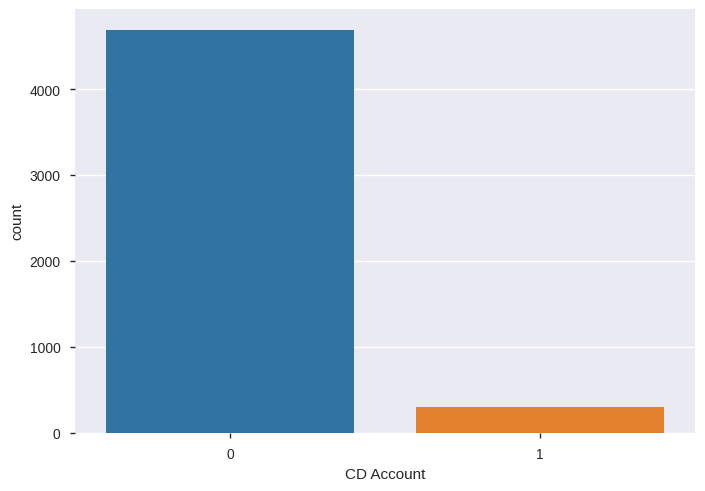

In [216]:
sns.countplot(df['CD Account'])

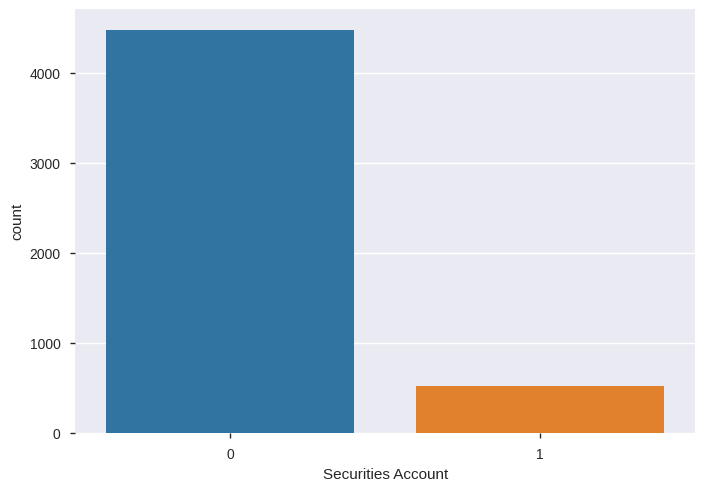

In [217]:
sns.countplot(df['Securities Account'])

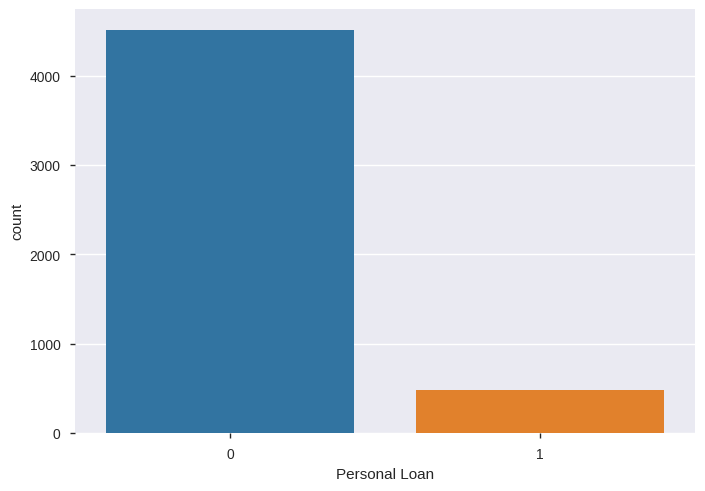

In [218]:
sns.countplot(df['Personal Loan'])

Bivariate Analysis

cross tabulation can be given as:  
 Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
cross tabulation is percentages can be given as:  
 Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


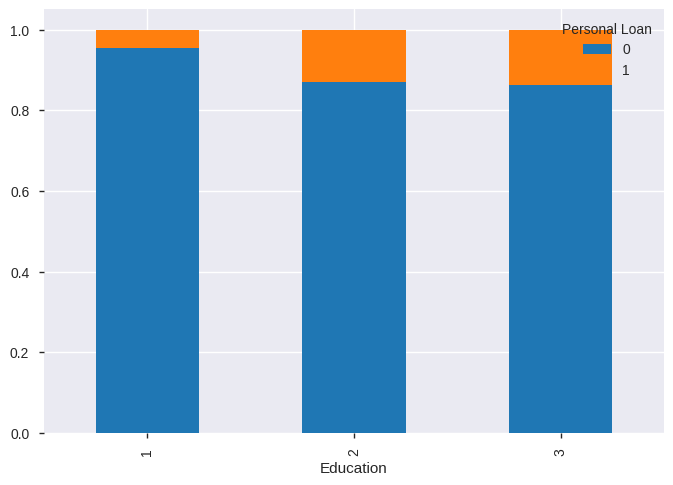

In [219]:
#Categorical Independent Variable vs Target Variable

edu=pd.crosstab(df['Education'],df['Personal Loan'])
edu.div(edu.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as: ','\n',edu)
print('cross tabulation is percentages can be given as: ','\n',edu.div(edu.sum(1).astype(float),axis=0))

cross tabulation can be given as:  
 Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134
cross tabulation is percentages can be given as:  
 Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


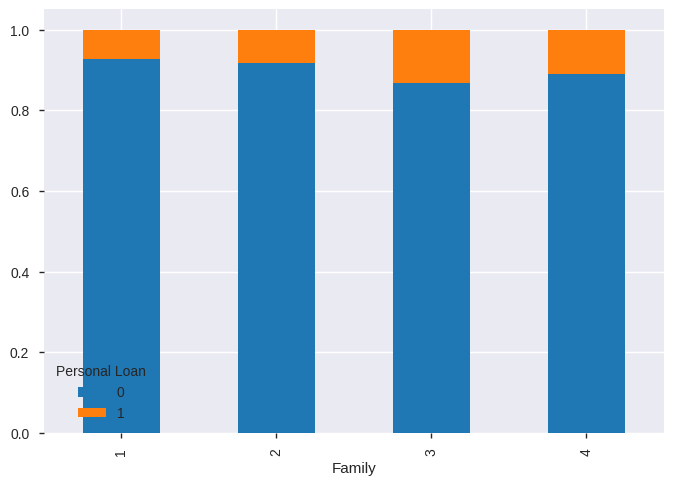

In [220]:
family=pd.crosstab(df['Family'],df['Personal Loan'])
family.div(family.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as: ','\n',family)
print('cross tabulation is percentages can be given as: ','\n',family.div(family.sum(1).astype(float),axis=0))

cross tabulation can be given as:  
 Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143
cross tabulation is percentages can be given as:  
 Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279


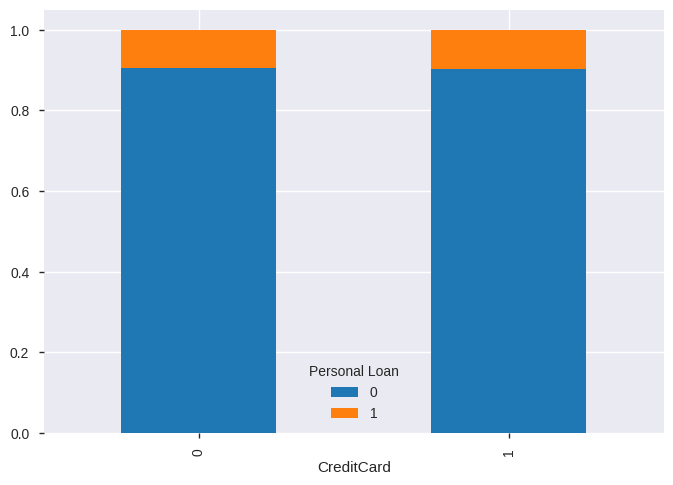

In [221]:
#Boolean Independent Variable vs Target Variable

credit=pd.crosstab(df['CreditCard'],df['Personal Loan'])
credit.div(credit.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as: ','\n',credit)
print('cross tabulation is percentages can be given as: ','\n',credit.div(credit.sum(1).astype(float),axis=0))

cross tabulation can be given as:  
 Personal Loan     0    1
Online                  
0              1827  189
1              2693  291
cross tabulation is percentages can be given as:  
 Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752


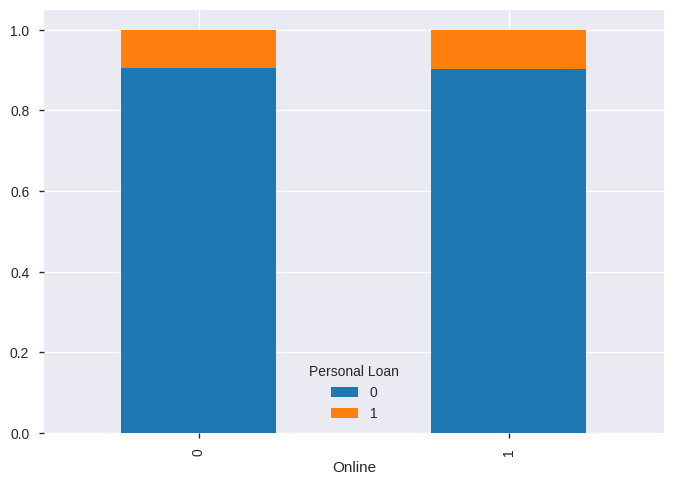

In [222]:
online=pd.crosstab(df['Online'],df['Personal Loan'])
online.div(online.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as: ','\n',online)
print('cross tabulation is percentages can be given as: ','\n',online.div(online.sum(1).astype(float),axis=0))

cross tabulation can be given as:  
 Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60
cross tabulation is percentages can be given as:  
 Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943


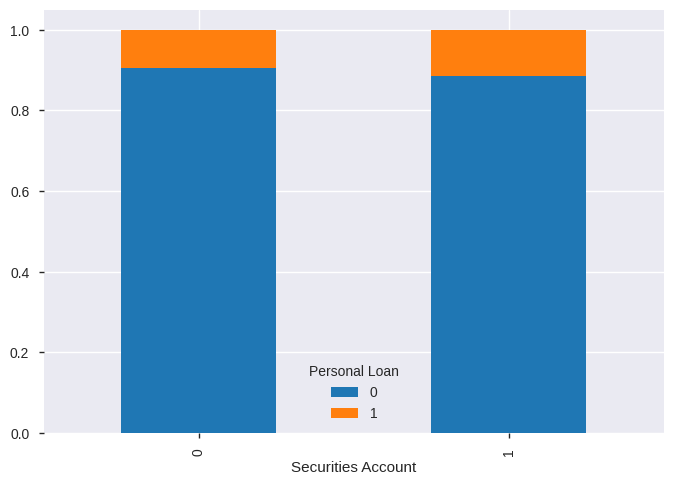

In [223]:
sec=pd.crosstab(df['Securities Account'],df['Personal Loan'])
sec.div(sec.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as: ','\n',sec)
print('cross tabulation is percentages can be given as: ','\n',sec.div(sec.sum(1).astype(float),axis=0))

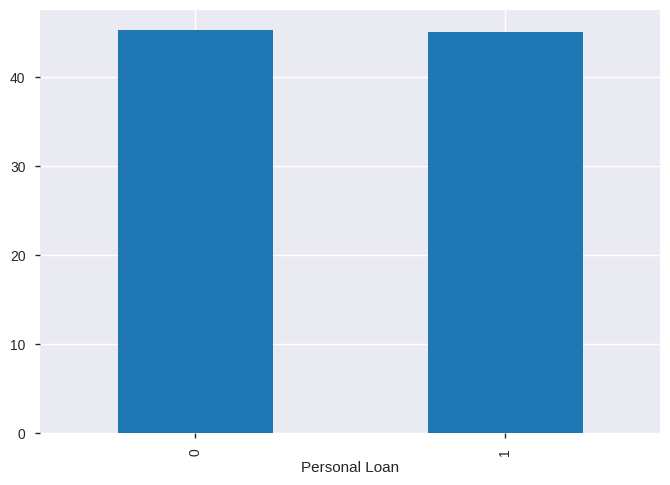

In [224]:
#Numerical Independent Variable vs Target Variable

df.groupby('Personal Loan')['Age'].mean().plot(kind='bar')

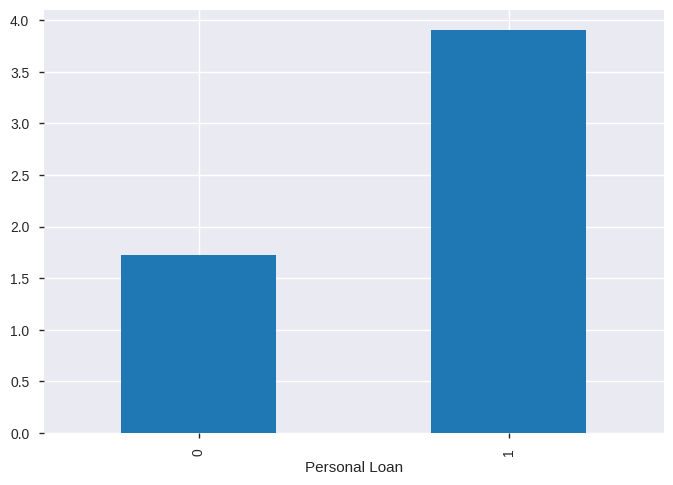

In [225]:
df.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')

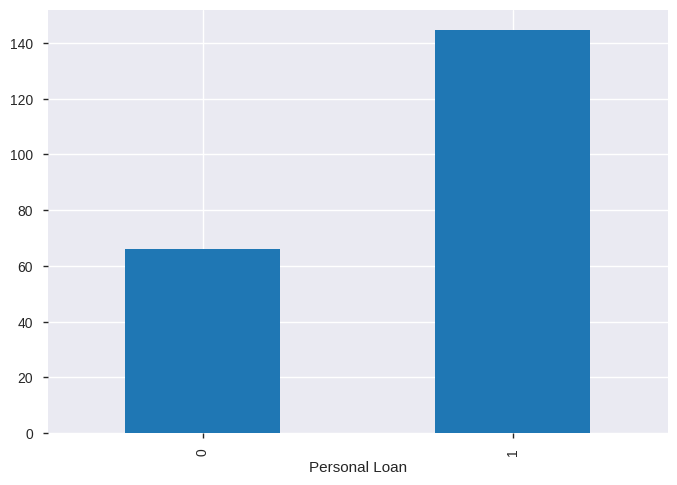

In [226]:
df.groupby('Personal Loan')['Income'].mean().plot(kind='bar')

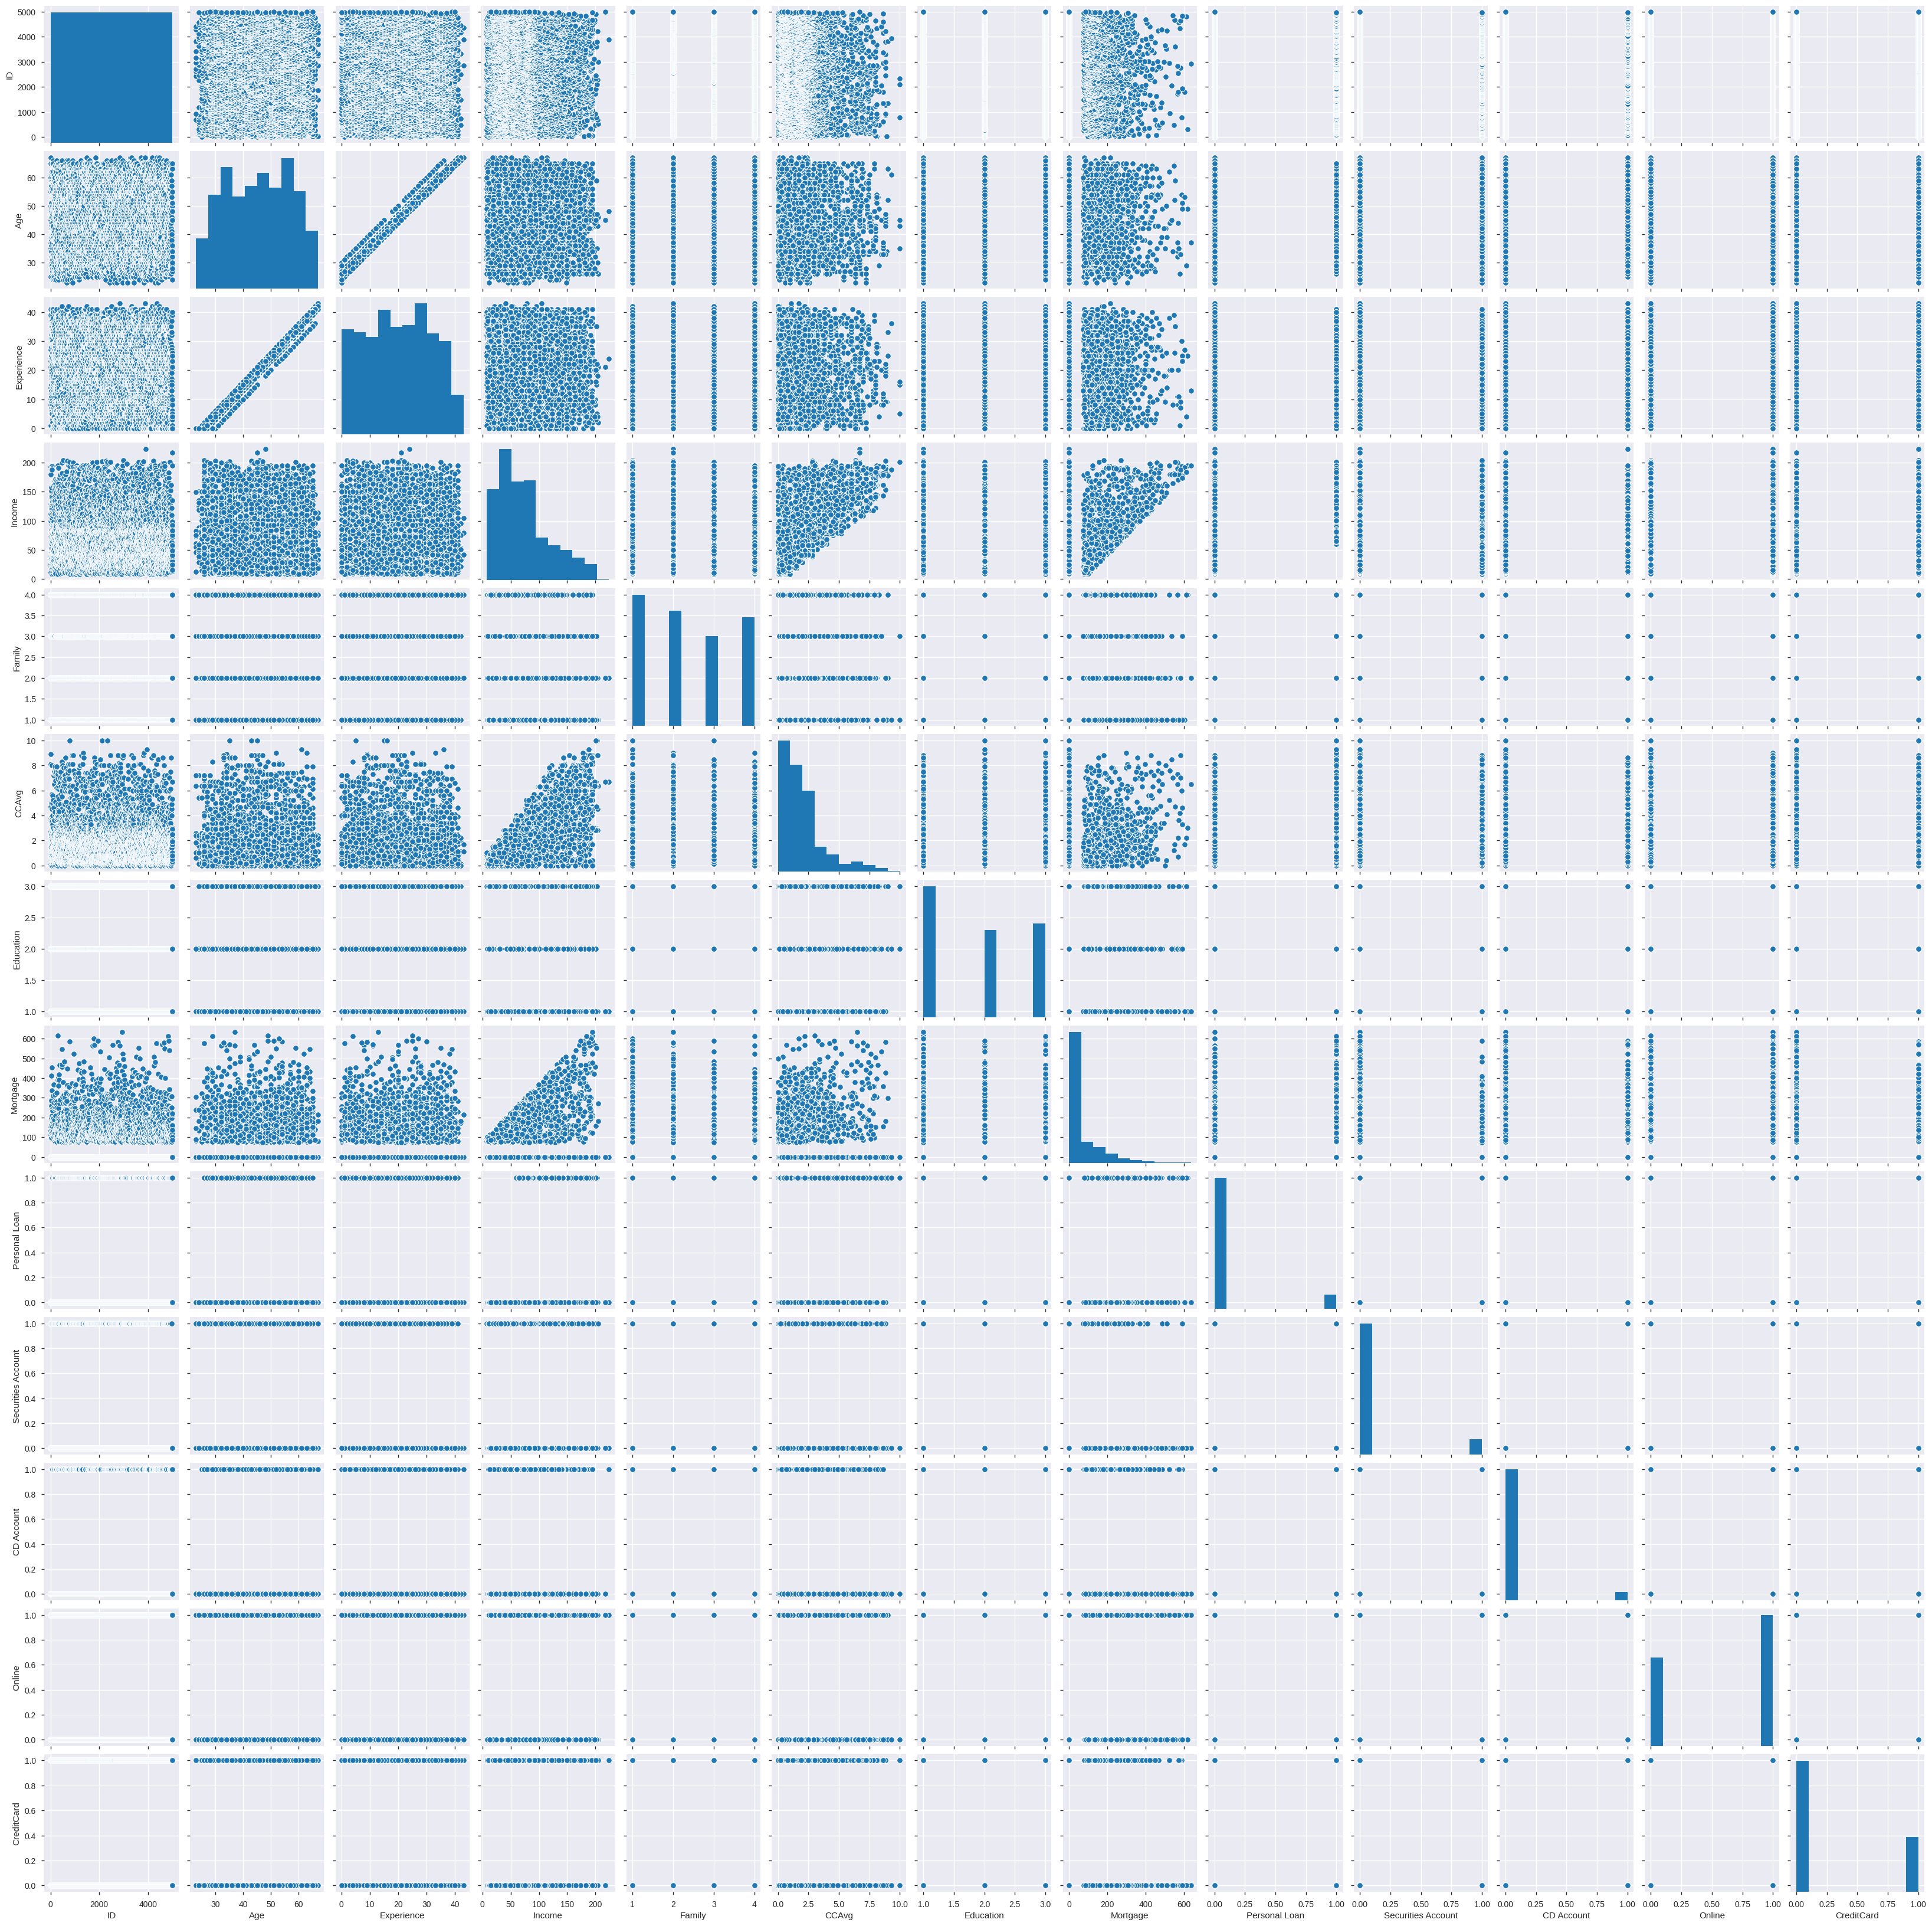

In [227]:
sns.pairplot(df)

In [228]:
df.corr()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008265,-0.017695,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994198,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008265,0.994198,1.000000,-0.046729,-0.052213,-0.049925,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.017695,-0.055269,-0.046729,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.016797,-0.046418,-0.052213,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.049925,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013536,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010840,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007858,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000436,-0.001111,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


Text(0.5, 1.0, 'Correlation matrix')

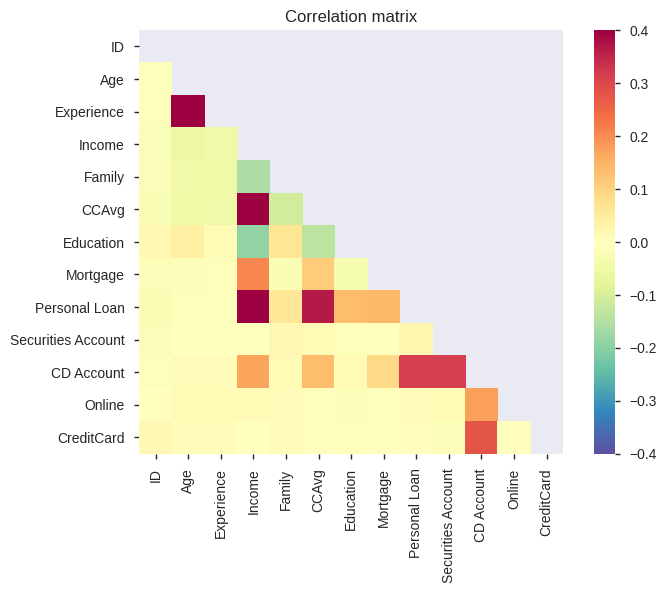

In [229]:
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

##Warm colors (red) indicate a positive correlation,cool colors (blue) indicate a negative correlation

In [230]:
#outlier treatment

from scipy import stats

df['Mortgage_zscore']=np.abs(stats.zscore(df['Mortgage']))
df=df[df['Mortgage_zscore']<3]
df.drop('Mortgage_zscore',axis=1,inplace=True)

#Here we had dropped more than 100+ rows which contain outliers

In [231]:
df.shape

(4895, 13)

**STEP 4**


 Apply necessary transformations for the feature variables

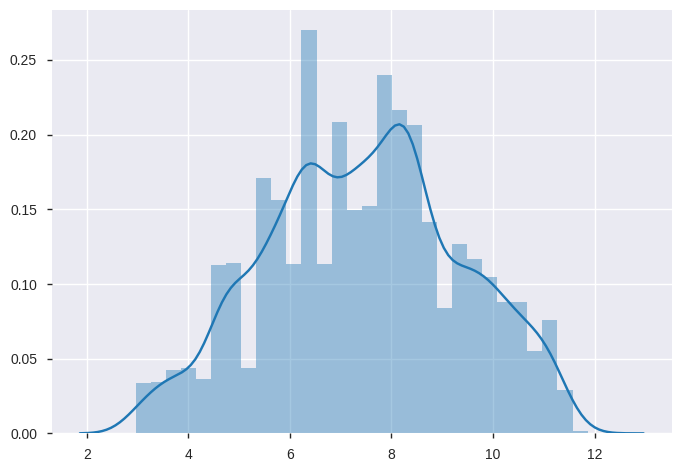

In [232]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(df.loc[:,df.columns != 'Personal Loan']['Income'].values.reshape(-1,1))
temp = pt.transform(df.loc[:,df.columns != 'Personal Loan']['Income'].values.reshape(-1,1))
sns.distplot(temp)

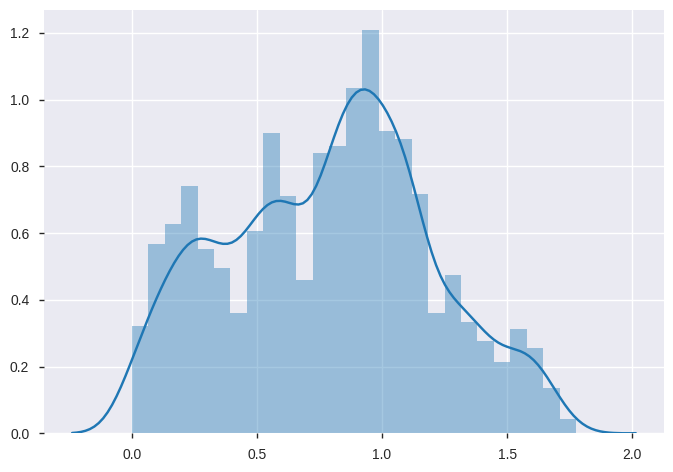

In [233]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(df.loc[:,df.columns != 'Personal Loan']['CCAvg'].values.reshape(-1,1))
temp = pt.transform(df.loc[:,df.columns != 'Personal Loan']['CCAvg'].values.reshape(-1,1))
sns.distplot(temp)

In [234]:
X = df.loc[:,df.columns != 'Personal Loan']
X['Mortgage_Int'] = pd.cut(X['Mortgage'], bins=[0,100,200,300,400,500,600,700], labels=[0,1,2,3,4,5,6], include_lowest=True)
X.drop('Mortgage', axis=1, inplace=True)

In [235]:
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


**STEP 5**

Normalizing the data and splitting the data into training and test

In [236]:
from sklearn.model_selection import train_test_split
y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)


In [240]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
normalized_train_X = normalizer.fit_transform(X_train)
normalized_train_X

array([[9.99762044e-01, 1.81698089e-02, 7.60596652e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.97514779e-01, 3.35881513e-02, 1.97263746e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99880408e-01, 1.20244637e-02, 6.47471125e-03, ...,
        2.31239687e-04, 0.00000000e+00, 2.31239687e-04],
       ...,
       [9.97249396e-01, 5.93600831e-02, 3.23782271e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99754481e-01, 1.03092777e-02, 4.17280289e-03, ...,
        2.45458994e-04, 0.00000000e+00, 0.00000000e+00],
       [9.58379428e-01, 2.28567479e-01, 1.28318585e-01, ...,
        4.00995577e-03, 4.00995577e-03, 0.00000000e+00]])

In [241]:
normalized_test_X = normalizer.transform(X_test)
normalized_test_X

array([[9.94718613e-01, 7.84906948e-02, 3.92453474e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99746622e-01, 7.80645463e-03, 1.04086062e-03, ...,
        2.60215154e-04, 0.00000000e+00, 0.00000000e+00],
       [9.96927460e-01, 5.09519338e-02, 2.69180028e-02, ...,
        9.61357242e-04, 9.61357242e-04, 9.61357242e-04],
       ...,
       [9.99384663e-01, 2.94647001e-02, 1.78720312e-02, ...,
        4.83027870e-04, 0.00000000e+00, 0.00000000e+00],
       [9.99445735e-01, 9.80535409e-03, 4.20229461e-03, ...,
        2.33460812e-04, 2.33460812e-04, 0.00000000e+00],
       [9.99785550e-01, 1.02201436e-02, 3.57705027e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

**STEP 6**

Model building

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

LogReg_model=LogisticRegression()
LogReg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
y_pred=LogReg_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1117
           1       0.79      0.56      0.66       107

    accuracy                           0.95      1224
   macro avg       0.87      0.77      0.81      1224
weighted avg       0.94      0.95      0.94      1224

0.9485294117647058
[[1101   16]
 [  47   60]]


In [284]:
LogReg_prob=LogReg_model.predict_proba(X_test)
fpr1,tpr1,thresholds1=roc_curve(y_test,LogReg_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print(roc_auc1)

0.9426451024523298


In [286]:
from sklearn.tree import DecisionTreeClassifier
scaler=preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

dec_tree_e=DecisionTreeClassifier(criterion='entropy',random_state=1)
dec_tree_e.fit(scaled_X_train,y_train)
y_pred1=dec_tree_e.predict(scaled_X_test)
y_test1=y_test
print(classification_report(y_test1,y_pred1))
print(accuracy_score(y_test1,y_pred1))
print(confusion_matrix(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1117
           1       0.89      0.89      0.89       107

    accuracy                           0.98      1224
   macro avg       0.94      0.94      0.94      1224
weighted avg       0.98      0.98      0.98      1224

0.9803921568627451
[[1105   12]
 [  12   95]]


In [246]:
dec_prob=dec_tree_e.predict_proba(scaled_X_test)

fpr,tpr,thresholds=roc_curve(y_test,dec_prob[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.9385537027585572


**STEP 7**



[[1101   16]
 [  47   60]]


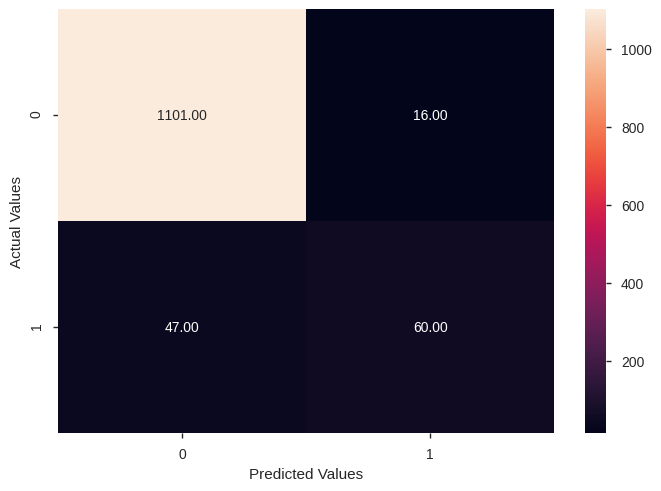

In [265]:
#Construct the Confusion Matrix for Logistic Regression

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])


plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [273]:
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

Recall: 0.560748


In [275]:
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

Precision: 0.789474


In [276]:
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.655738


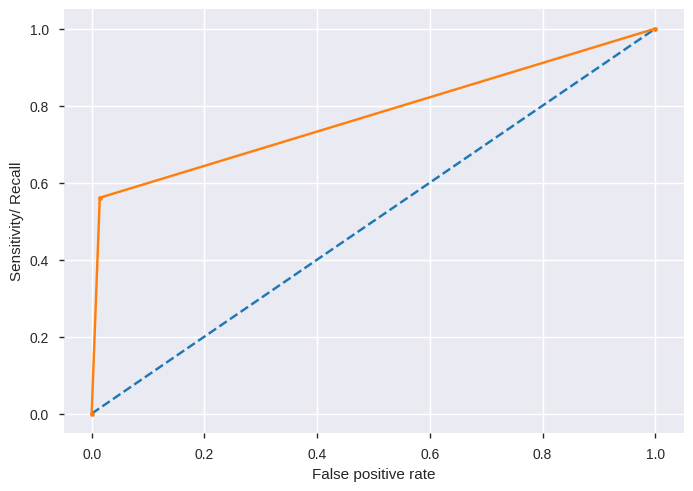

ROC Auc Score: 0.9385537027585572


In [291]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')

# show the plot
plt.show()

print('ROC Auc Score:',roc_auc_score(y_test,y_pred))

[[1105   12]
 [  12   95]]


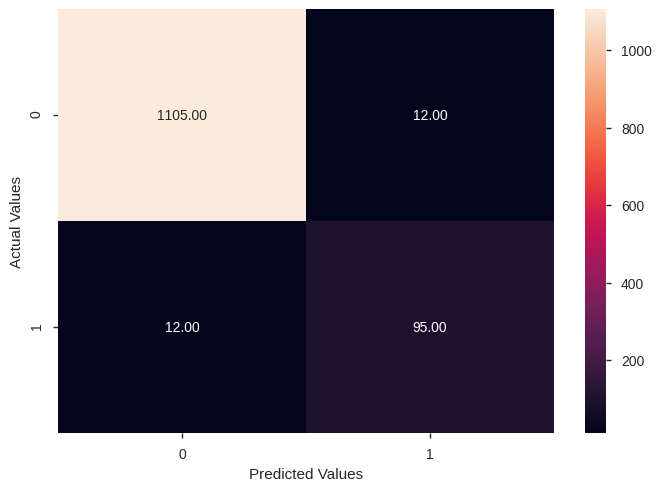

In [293]:
#Construct the Confusion Matrix for Decision Tree

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])


plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [294]:
recall = recall_score(y_test1, y_pred1)
print('Recall: %f' % recall)

Recall: 0.887850


In [295]:
precision = precision_score(y_test1, y_pred1)
print('Precision: %f' % precision)

Precision: 0.887850


In [296]:
f1 = f1_score(y_test1, y_pred1)
print('F1 score: %f' % f1)

F1 score: 0.887850


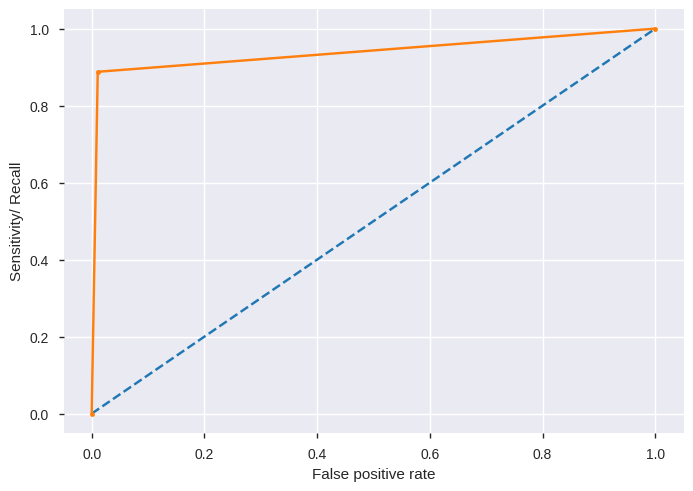

ROC Auc Score: 0.9385537027585572


In [297]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')

# show the plot
plt.show()

print('ROC Auc Score:',roc_auc_score(y_test,y_pred))

**CONCLUSION**

We have 13 independent variables and 1 dependent variable i.e. ‘Personal Loan’
in the data set. Also, we got 5000 rows which can be split into test & train datasets.

--------------------------------------------------------------------------------

No need for ZIP Code column for further analysis.

--------------------------------------------------------------------------------

*Bivariate Analysis* 


*   Categorical Independent Variable vs Target Variable


1.   Between the personal loan buyers and their education level which will give us the proportion of purchased and not purchased loans. For the plot, we will be using the crosstab function of pandas which computes a simple cross-tabulation of two (or more) factors. We will also use pd.crosstab.div() function to convert it into percentages.we can infer that customers who are more educated have a higher probability of buying personal loans. Hence our hypothesis was true…!

2.   Between the personal loan buyers and their family size with the same code as above just replacing the categorical variables.The number of family members not significantly affect probability. Hence it contradicts our hypothesis that the number of family members will affect the probability.




*   Boolean Independent Variable vs Target Variable


1.   The customer who has a certificate of deposit (CD) account with the bank seems to buy personal loans from the bank.
2.   The customer who uses or doesn’t use a credit card issued by UniversalBank doesn’t seem to affect the probability of buying a personal loan.

3.   The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans.



--------------------------------------------------------------------------------

Outlier Treatment


Here I had chosen those rows only whose z_score is less than 3, it can vary accordingly. Here we had dropped more than 100+ rows which contain outliers 

--------------------------------------------------------------------------------
Model Building

 Logistic Regression:-we are with a classification report which consists of a precision, recall, f1-score & support, Also the accuracy_score and a 2*2 confusion matrix. How to determine if our model has done well…? Well first have a look at the accuracy, 94% accuracy is not a small thing, but we know from the data that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed.

We will look upon the error types now:
Type I error — Actually null hypothesis but predicted alternate hypothesis by the model
Type II error — Actually alternate hypothesis but predicted null hypothesis by the model
In our case, the null hypothesis presents the non-buyer case, while the alternate hypothesis is the buyer one.

We will also compare the area under roc curve to determine how our model performs. In this case, the area comes out to be around 94% which is good.


Decision Trees:-We got a 98% accuracy score while 89% recall value 




